# Fake News Detection: Comparing Performance of Classifiers
#### Natural Language Processing (CSCI-GA 2590)
#### Tina Yuan, Pin-Tsung Huang

### Abstract
Fake news has been around even before the Internet. Sometimes, it is hard to tell between true and fake news, which leads to further spreading of such misinformation. We would use articles that are tagged as either “real” or “fake” and perform classification on the data. We would like to test different classifiers and compare their performance and efficiency in detecting fake news. We are comparing performance of four classifier models: Multinomial Naive Bayes, Support Vector Machines, Long Short-Term Memory and Random Forests. Surprisingly, all four models trained on the dataset achieved an accuracy above 0.97. The experiment result suggests that the pre-trained model is unable to accurately identify fake news in the new test data. To further elaborate on our studies, we decided to explore whether or not fake news classifier models trained on one data set can be used upon inference on another data set.

### Import Libraries

In [1]:
# Basic libraries
import numpy as np
import pandas as pd
#from collections import Counter

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Natural Language Processing libraries from scikit-learn
# Feature extraction
from sklearn.feature_extraction.text import CountVectorizer

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [2]:
# Create and show the confusion matrix
# Code from https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

def show_cnf_matrix(cnf_matrix):
    # name  of classes
    class_names=[0,1] 

    # Set fig and axes 
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    # Create heatmap
    res = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues", fmt='g')
    total = 0
    idx = 0
    ht_labels = ['True Fake', 'False Real', ' False Fake', 'True Real']
    for t in res.texts: total += int(t.get_text())
    for t in res.texts:
        percentage = (int(t.get_text()) / total) * 100.00
        t.set_text(ht_labels[idx] + '\n' + t.get_text() + '\n' + f'{percentage:.2f}' " %")
        idx += 1
    ax.xaxis.set_label_position("top")
    plt.tight_layout()

### Data Merging and Cleaning

In [3]:
# do some merging and lowercasing here
df = pd.read_csv('labeled_input_data.csv', index_col=[0])

In [4]:
pd.DataFrame([df.isnull().sum()]).T

,0
text,9
label,0


We can see after the data cleaning that there are some NaN rows. We need to drop them.

In [5]:
# drop NaN rows
df.dropna(axis=0, how='any', inplace=True)

### Data Explorative Analysis

In [6]:
print(df.columns)
print(df.shape)

Index(['text', 'label'], dtype='object')
(44889, 2)


We can see the processed csv file has 44,889 rows with two columns: `'text'` and `'label'`.

In [7]:
df.head()

,text,label
0,donald trump sends embarrassing new year eve m...,0
1,drunk bragging trump staffer started russian c...,0
2,sheriff david clarke becomes internet joke thr...,0
3,trump obsessed even obamas name coded website ...,0
4,pope francis called donald trump christmas spe...,0


`text` is the input data, and if it is fake, `label = 0`; otherwise, `label = 1`.

In [8]:
print('Fake: {} rows\nTrue: {} rows'.format(df[df['label'] == 0].shape[0], df[df['label'] == 1].shape[0]))

Fake: 23472 rows
True: 21417 rows


Let's check the top 5 unigrams from both fake and real input.

In [9]:
cv = CountVectorizer(stop_words='english')
vec_false = cv.fit_transform(df[df['label'] == 0]['text'])
vec_df_false = pd.DataFrame(vec_false.toarray(), columns=cv.get_feature_names_out())
wc_false = vec_df_false.sum(axis=0).sort_values(ascending=False)

Text(0.5, 1.0, 'Top 5 unigrams from fake input')

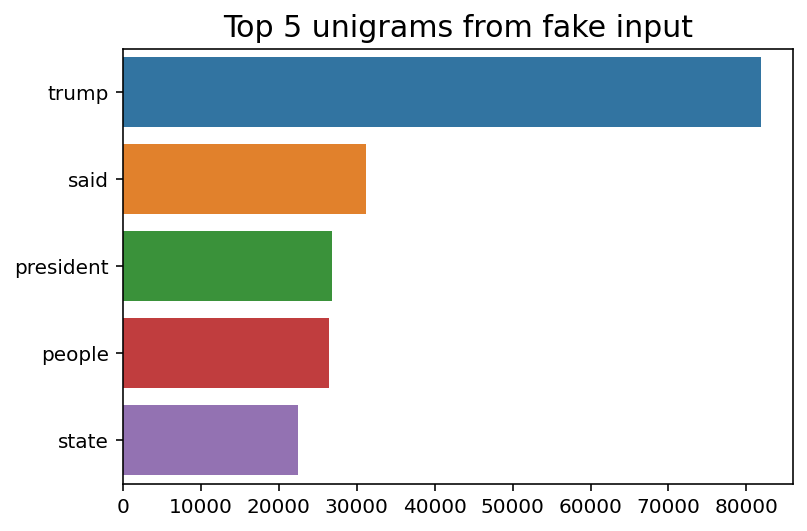

In [10]:
sns.barplot(x = wc_false.head(5).values, y = wc_false.head(5).index)
plt.title('Top 5 unigrams from fake input', fontsize = 15)

In [6]:
cv = CountVectorizer(stop_words='english')
vec_true = cv.fit_transform(df[df['label'] == 1]['text'])
vec_df_true = pd.DataFrame(vec_true.toarray(), columns=cv.get_feature_names_out())
wc_true = vec_df_true.sum(axis=0).sort_values(ascending=False)

Text(0.5, 1.0, 'Top 5 unigrams from real input')

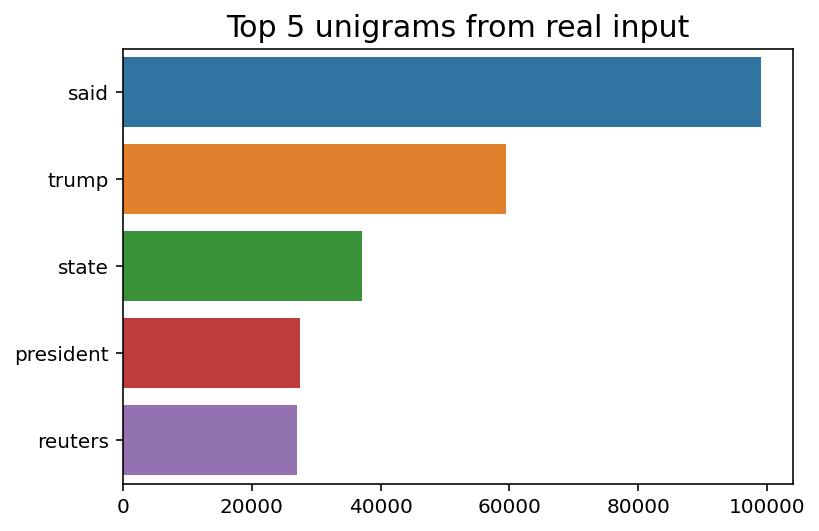

In [7]:
sns.barplot(x = wc_true.head(5).values, y = wc_true.head(5).index)
plt.title('Top 5 unigrams from real input', fontsize = 15)

As we can see, there's no correlation between the fact that a common word is present and whether the input is fake or real.

### Split Data into Training and Test Sets

In [8]:
X = df['text']
y = df['label']

Splitting data with a ratio of 3:1, using `train_test_split` from Scikit-learn.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42,
                                                    stratify=y)

In [10]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, sep='\n')

(33666,)
(11223,)
(33666,)
(11223,)


We can see that the data is in 3:1.

### Modeling, Training and Scoring

#### Use CountVectorizer

In [11]:
# Instantiate the vectorizer
cvec = CountVectorizer(ngram_range = (1, 1))

# Fit and transform the vectorizor
cvec.fit(X_train)

Xcvec_train = cvec.transform(X_train)
Xcvec_test = cvec.transform(X_test)

#### Multinomial Naive Bayes

In [36]:
# Instantiate the Multinomial Naive Bayes classifier
nb = MultinomialNB(alpha = 0.36)

In [37]:
%%time
# Fit the classifier
nb.fit(Xcvec_train, y_train)

CPU times: user 34.3 ms, sys: 25.9 ms, total: 60.2 ms
Wall time: 106 ms


MultinomialNB(alpha=0.36)

In [38]:
%%time
# Create the predictions for Y training data
preds_nb = nb.predict(Xcvec_test)

CPU times: user 12.6 ms, sys: 7.24 ms, total: 19.9 ms
Wall time: 24.2 ms


In [39]:
print(nb.score(Xcvec_test, y_test))

0.9618640292256972


In [40]:
# Create a confusion matrix
cnf_matrix_nb = metrics.confusion_matrix(y_test, preds_nb)
cnf_matrix_nb

array([[5629,  239],
       [ 189, 5166]])

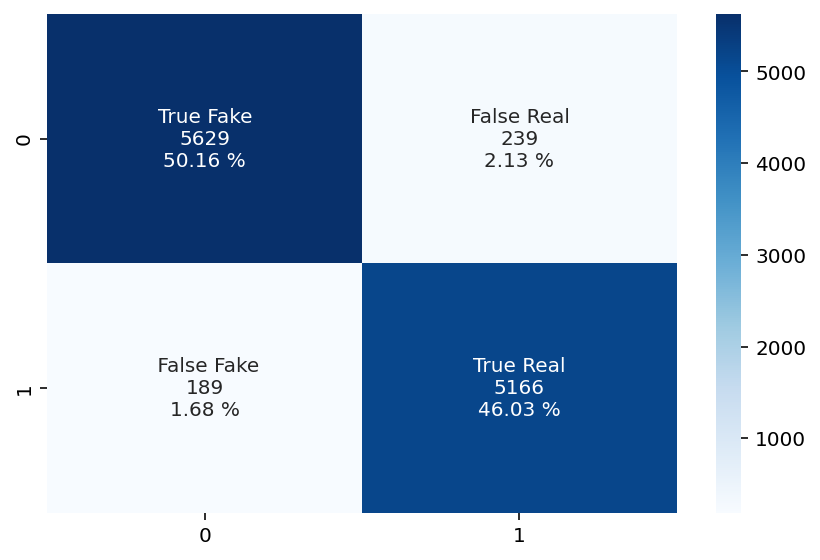

In [41]:
# Create and show the confusion matrix
show_cnf_matrix(cnf_matrix_nb)

#### Random Forests

In [42]:
# Instantiate the vectorizer
rf = RandomForestClassifier(n_estimators = 120)

In [43]:
%%time
# Fit the classifier
rf.fit(Xcvec_train, y_train)

CPU times: user 30.9 s, sys: 211 ms, total: 31.1 s
Wall time: 31.3 s


RandomForestClassifier(n_estimators=120)

In [44]:
%%time
# Create the predictions for Y training data
preds_rf = rf.predict(Xcvec_test)

CPU times: user 960 ms, sys: 45.9 ms, total: 1.01 s
Wall time: 1.12 s


In [45]:
print(rf.score(Xcvec_test, y_test))

0.9843179185600998


In [46]:
# Create a confusion matrix
cnf_matrix_rf = metrics.confusion_matrix(y_test, preds_rf)
cnf_matrix_rf

array([[5748,  120],
       [  56, 5299]])

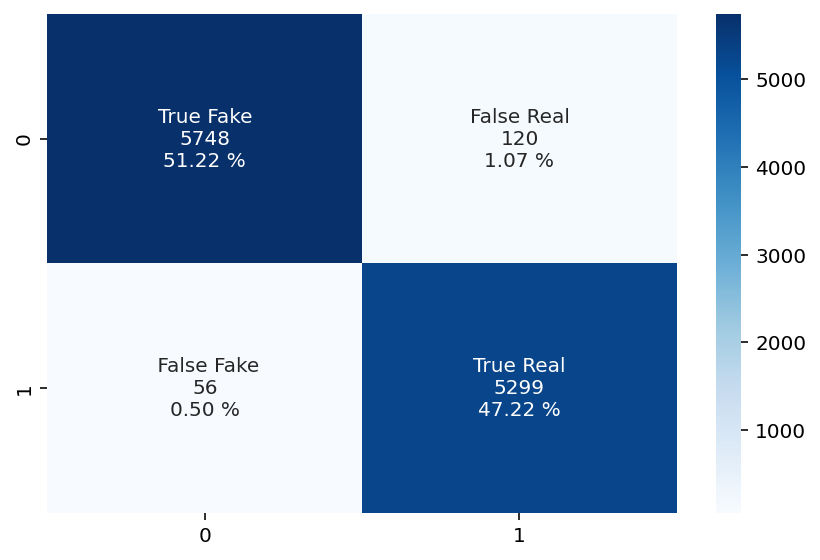

In [47]:
show_cnf_matrix(cnf_matrix_rf)

### Conclusion

We can see Multinomial Naive Bayes is extremely fast and it is still very effective.